<a href="https://colab.research.google.com/github/DKapoor-Qual/DKapoor-Qual/blob/main/Training_AutoEncoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
 
from sklearn.model_selection import train_test_split 
 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Dense, Input 
from tensorflow.keras.utils import to_categorical 
%matplotlib inline 
sns.set(style = 'white', context = 'notebook', palette = 'deep') 
np.random.seed(42) 

In [7]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fashion-mnist_train.csv") 
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/fashion-mnist_test.csv") 

In [8]:
train.head() 

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [9]:
y_train = train["label"] 
x_train = train.drop(labels = ["label"], axis = 1) 
 
print(type(x_train)) 
print(type(y_train)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
y_train = train["label"] 
x_train = train.drop(labels = ["label"], axis = 1) 
 
print(type(x_train)) 
print(type(y_train)) 

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [11]:
x_train = x_train.to_numpy() 
y_train = y_train.to_numpy() 
 
print(type(x_train)) 
print(type(y_train)) 

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
x_train = x_train.astype('float')/255. 

In [13]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state = 42) 

In [14]:
x_train_size = len(x_train) 
x_val_size = len(x_val) 
 
print(x_train_size) 
print(x_val_size) 

48000
12000


In [15]:
#method-1 
x_train_noisy = x_train + np.random.rand(x_train_size, 784) * 0.9 
x_val_noisy = x_val + np.random.rand(x_val_size, 784) * 0.9 
 
#method-2: Adding Gaussian Noise 
# x_train_noisy = x_train + 0.75 * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
# x_val_noisy = x_val + 0.75 * np.random.normal(loc=0.0, scale=1.0, size=x_val.shape) 
 
x_train_noisy = np.clip(x_train_noisy, 0., 1.) 
x_val_noisy = np.clip(x_val_noisy, 0., 1.) 

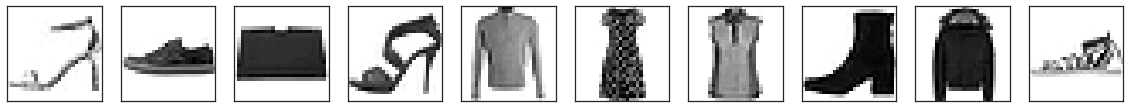

In [19]:
def plot(x, p , labels = False): 
 plt.figure(figsize = (20,2)) 
 for i in range(10): 
  plt.subplot(1, 10, i+1) 
  plt.imshow(x[i].reshape(28,28), cmap = 'binary') 
  plt.xticks([]) 
  plt.yticks([]) 
 if labels: 
  plt.xlabel(np.argmax(p[i])) 
  plt.show() 
 return 
plot(x_train, None)

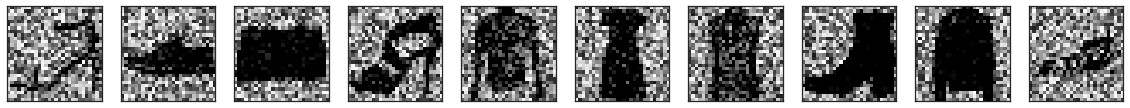

In [20]:
plot(x_train_noisy,None) 

In [21]:
input_image = Input(shape = (784, ) ) 
 
encoded = Dense(512, activation = 'relu')(input_image) 
encoded = Dense(512, activation = 'relu')(encoded) 
encoded = Dense(256, activation = 'relu')(encoded) 
encoded = Dense(256, activation = 'relu')(encoded) 
encoded = Dense(64, activation = 'relu')(encoded) 
 
decoded = Dense(512, activation = 'relu')(encoded) 
decoded = Dense(784, activation = 'sigmoid')(decoded) 
 
autoencoder = Model(input_image, decoded) 
autoencoder.compile(loss= 'binary_crossentropy' , optimizer = 'adam') 
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                                 
 dense_5 (Dense)             (None, 512)               33280 

In [22]:
import tensorflow as tf 
history = autoencoder.fit(x_train_noisy, x_train, epochs=100, batch_size=128, 
 shuffle = True, validation_data=(x_val_noisy, x_val))

Epoch 1/100
375/375 [==============================] - 13s 34ms/step - loss: 0.3716 - val_loss: 0.3245
Epoch 2/100
375/375 [==============================] - 12s 33ms/step - loss: 0.3185 - val_loss: 0.3129
Epoch 3/100
375/375 [==============================] - 12s 33ms/step - loss: 0.3107 - val_loss: 0.3093
Epoch 4/100
375/375 [==============================] - 12s 33ms/step - loss: 0.3057 - val_loss: 0.3057
Epoch 5/100
375/375 [==============================] - 12s 33ms/step - loss: 0.3024 - val_loss: 0.3018
Epoch 6/100
375/375 [==============================] - 12s 33ms/step - loss: 0.2999 - val_loss: 0.3006
Epoch 7/100
375/375 [==============================] - 12s 33ms/step - loss: 0.2978 - val_loss: 0.2972
Epoch 8/100
375/375 [==============================] - 12s 33ms/step - loss: 0.2960 - val_loss: 0.2977
Epoch 9/100
375/375 [==============================] - 12s 33ms/step - loss: 0.2940 - val_loss: 0.2942
Epoch 10/100
375/375 [==============================] - 12s 33ms/step - l

In [23]:
preds = autoencoder.predict(x_val_noisy) 

Test Image


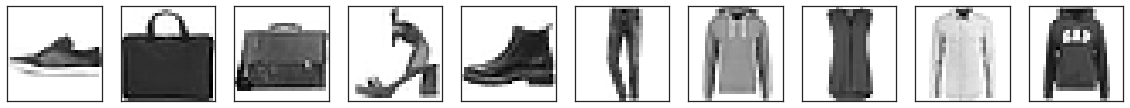

In [24]:
print("Test Image") 
plot(x_val, None)

Noisy Image


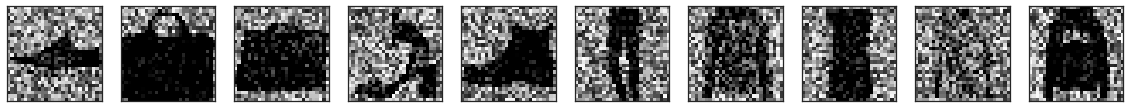

In [25]:
print("Noisy Image") 
plot(x_val_noisy, None)

Denoised Image


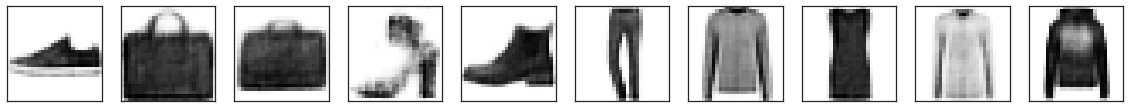

In [26]:
print("Denoised Image") 
plot(preds, None) 
 

In [29]:
def plot_loss(history, x = 'loss', y = 'val_loss'): 
 fig, ax = plt.subplots( figsize=(20,10)) 
 ax.plot(history.history[x]) 
 ax.plot(history.history[y]) 
 plt.title('Model Loss') 
 plt.ylabel(y) 
 plt.xlabel(x) 
 plt.legend(['Train', 'Val'], loc='upper left') 
 ax.grid(color='black') 
 plt.show() 

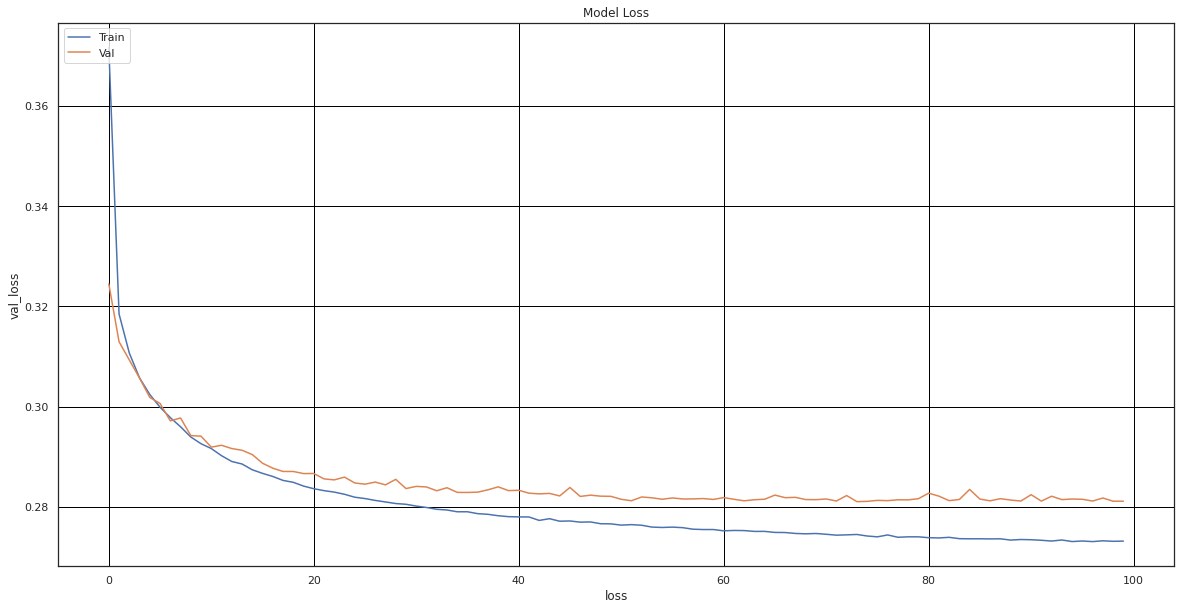

In [30]:
plot_loss(history) 